In [1]:
import pandas as pd
df = pd.read_csv("../data/df_baseline-utf8.csv")

## Load Data

In [2]:
print(df.shape)
df.head()

(1091, 18)


,label,artist,album,genre,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
0,0,Flash Bang Grenada,10 Haters,hiphop,0,0,0,0,0,NaN,NaN,NaN,0,0,0,346,0,0
1,0,Aggro Santos,AggroSantos.com,hiphop,3,0,0,0,0,NaN,NaN,NaN,63771,27415,596562,4675,585,7975
2,0,AKA,Altar Ego,hiphop,4,0,0,1,2,NaN,NaN,NaN,38958,0,0,22298,0,3643764
3,0,Shlohmo,Bad Vibes,hiphop,0,0,0,0,67,NaN,NaN,7.8,91790,59340,209063,141268,283539,0
4,0,Glasses Malone,Beach Cruiser,hiphop,4,0,0,0,4,NaN,NaN,NaN,68417,48745,93741,16402,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 18 columns):
label             1091 non-null int64
artist            1091 non-null object
album             1091 non-null object
genre             1091 non-null object
single_count      1091 non-null int64
freq_billboard    1091 non-null int64
freq_genius       1091 non-null int64
freq_theSource    1091 non-null int64
freq_xxl          1091 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1091 non-null int64
instagram         1091 non-null int64
facebook          1091 non-null int64
spotify           1091 non-null int64
soundcloud        1091 non-null int64
youtube           1091 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 153.5+ KB


**Note**
- 온라인매체 기사의 양, 평론가 평점은 Null Value가 있기 때문에, 당장 Decision Tree를 통해 학습을 시킬 수 없어, Feature에서 제외를 한다.

## Data Preparation for Modeling

#### 장르 `hiphop`, `R&B`, `Soul`, `Funk`, `Pop`

In [4]:
df = pd.get_dummies(df, columns=['genre'])

In [5]:
df.columns

Index(['label', 'artist', 'album', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube', 'genre_funk', 'genre_hiphop',
       'genre_pop', 'genre_rnb', 'genre_soul'],
      dtype='object')

#### Split train & test data 

In [6]:
feature_names = ['single_count', 
                 'freq_billboard', 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul']
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [7]:
dfX.tail()

,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul
1086,0,0,0,200,9,3708,7855,10703,15130,1043,14066,0,0,1,0,0
1087,3,2,0,0,9,600,286554,355355,329507,21954,1728617,0,0,1,0,0
1088,2,0,0,0,0,1913,23837,9187,16544,756,743,0,0,1,0,0
1089,6,2,0,0,0,11571,27192,27615,60983,6295,43228,0,0,1,0,0
1090,4,1,0,0,213,19974,27428,60138,37009,2341,22642,0,0,1,0,0


In [8]:
dfy.tail()

1086    0
1087    0
1088    0
1089    0
1090    0
Name: label, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7).fit(X_train, y_train)

In [11]:
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf, feature_names=dfX.columns)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

    plt.xlabel(dfX.columns)
    plt.ylabel(dfy.columns)
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

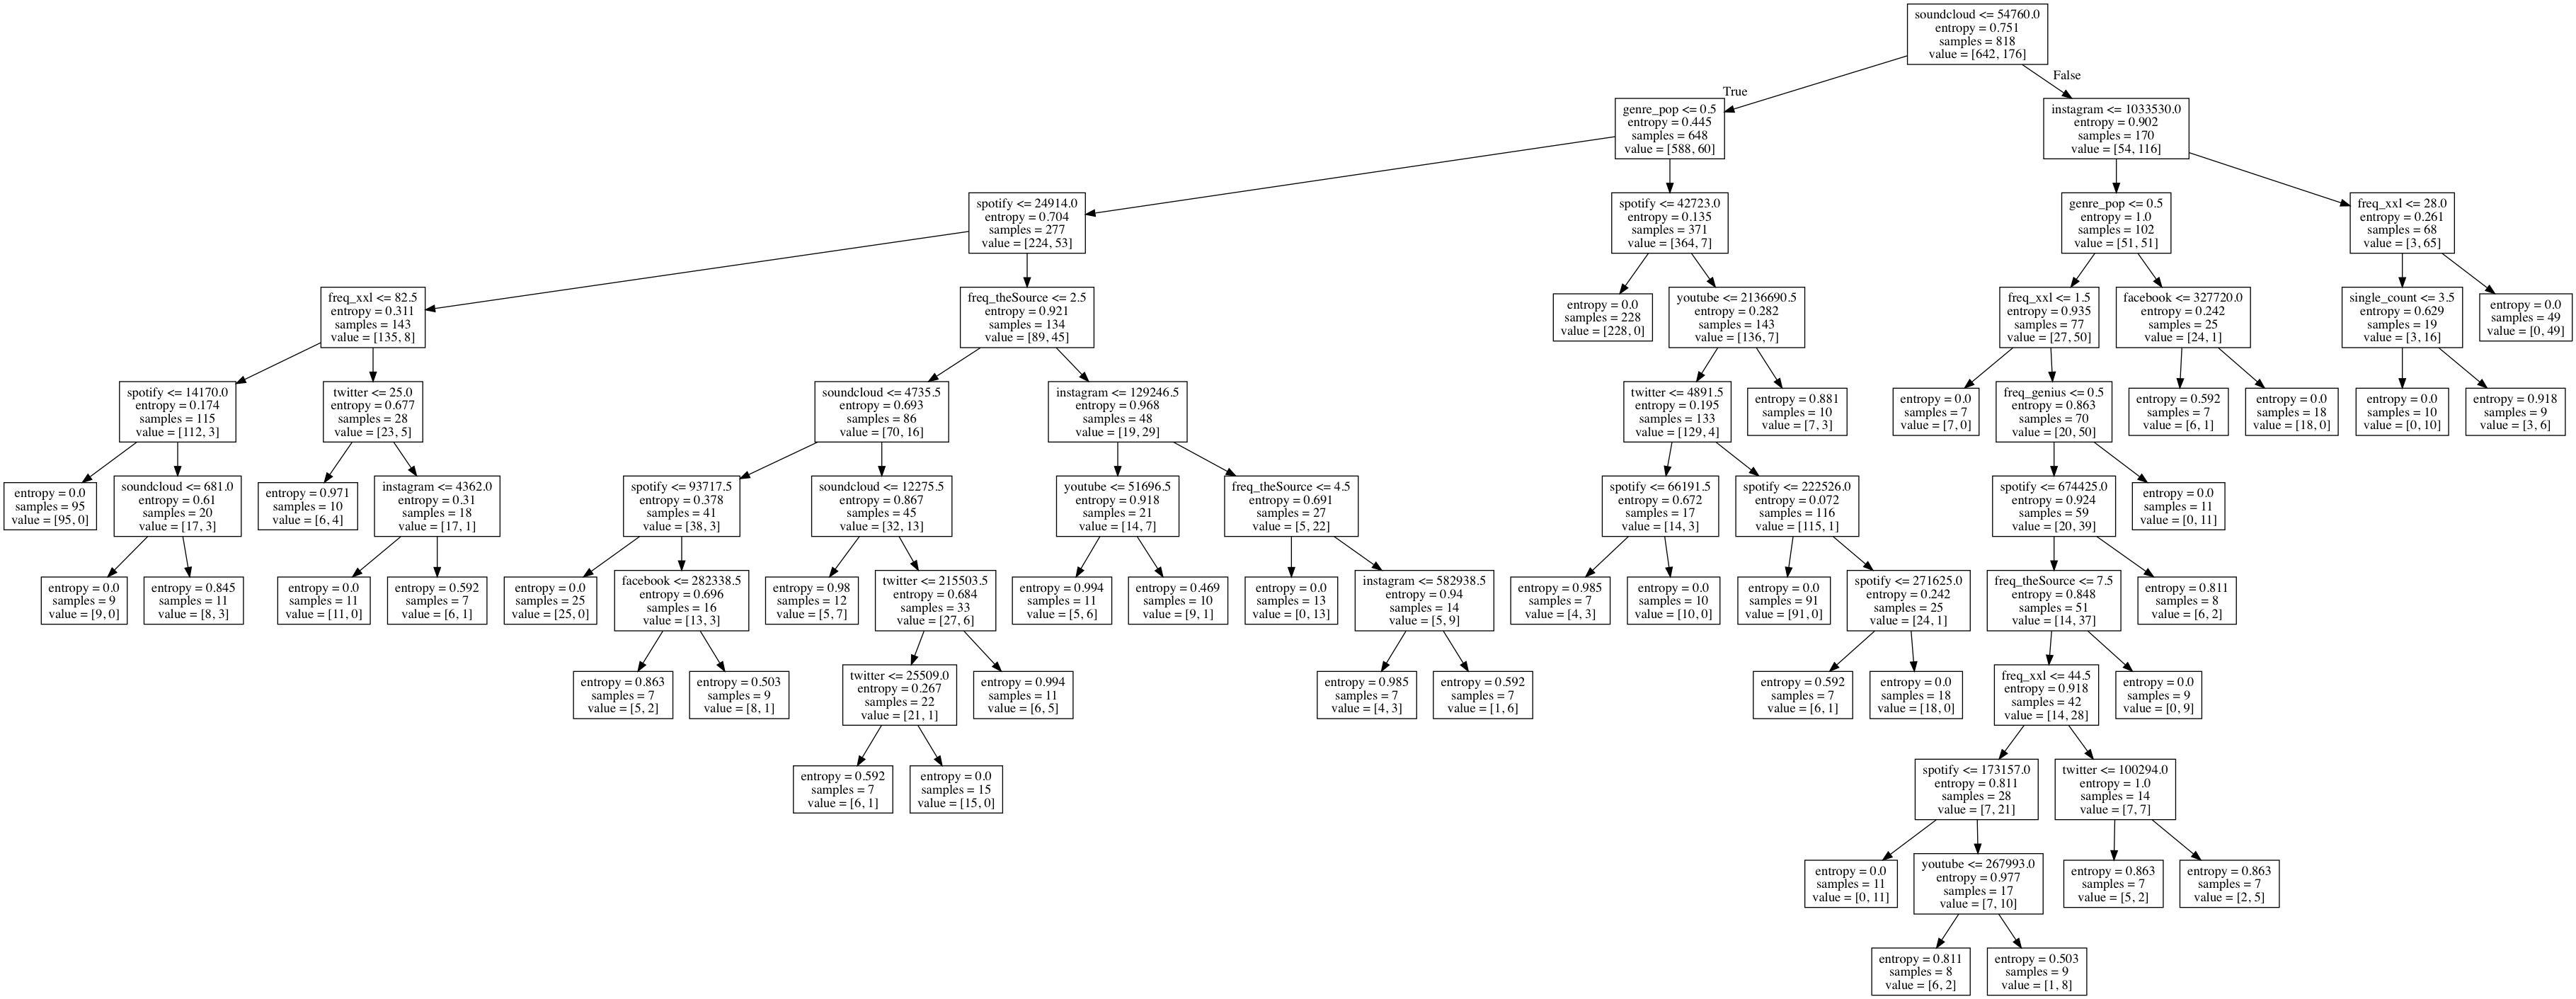

In [12]:
draw_decision_tree(model)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y_train, model.predict(X_train))

array([[625,  17],
       [ 35, 141]])

In [15]:
confusion_matrix(y_test, model.predict(X_test))

array([[202,  20],
       [ 18,  33]])

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       642
          1       0.89      0.80      0.84       176

avg / total       0.94      0.94      0.94       818



In [17]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.91      0.91       222
          1       0.62      0.65      0.63        51

avg / total       0.86      0.86      0.86       273



In [18]:
for name, importance in zip(dfX.columns, model.feature_importances_):
    print(name, importance)

single_count 0.007930358473441004
freq_billboard 0.0
freq_genius 0.012701533295113247
freq_theSource 0.058999646503124004
freq_xxl 0.0530026654797118
twitter 0.041396514399207655
instagram 0.09810358245255955
facebook 0.005336552198458881
spotify 0.14770916405071993
soundcloud 0.39852564398513624
youtube 0.03191522965586803
genre_funk 0.0
genre_hiphop 0.0
genre_pop 0.14437910950665966
genre_rnb 0.0
genre_soul 0.0


In [19]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

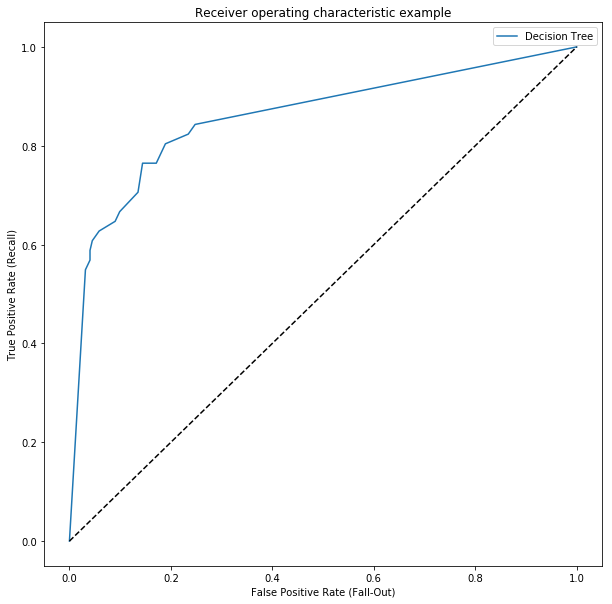

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [23]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8580639462992404

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model2 = RandomForestClassifier(criterion='entropy', n_estimators=10, max_depth=10, 
                                min_samples_split=5 , min_samples_leaf=5
                                ).fit(X_train, y_train)

In [26]:
confusion_matrix(y_train, model2.predict(X_train))

array([[631,  11],
       [ 27, 149]])

In [27]:
confusion_matrix(y_test, model2.predict(X_test))

array([[210,  12],
       [ 17,  34]])

In [28]:
print(classification_report(y_train, model2.predict(X_train)))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       642
          1       0.93      0.85      0.89       176

avg / total       0.95      0.95      0.95       818



In [29]:
print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       222
          1       0.74      0.67      0.70        51

avg / total       0.89      0.89      0.89       273



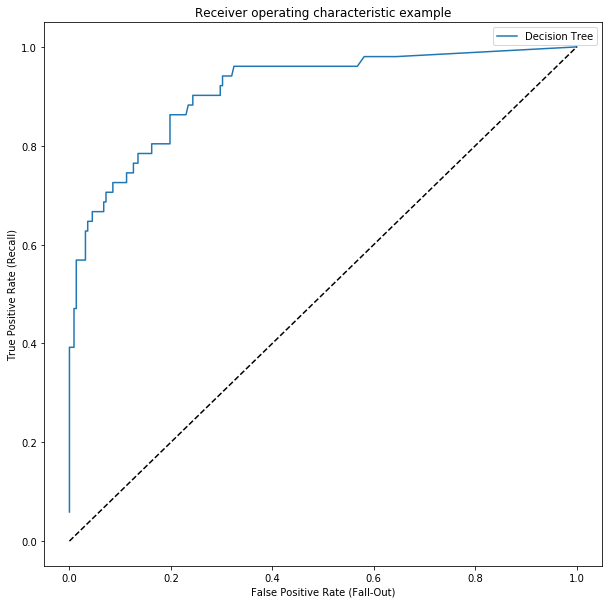

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [31]:
auc(fpr, tpr)

0.9131778837661193

In [32]:
for name, importance in zip(dfX.columns, model2.feature_importances_):
    print(name, importance)

single_count 0.02113344205566914
freq_billboard 0.004976718618026675
freq_genius 0.01100244812256996
freq_theSource 0.09062689277411373
freq_xxl 0.052208179451282345
twitter 0.04542646536597916
instagram 0.1282332642114423
facebook 0.03555756636401082
spotify 0.1265149252318301
soundcloud 0.27009151974318535
youtube 0.0672300696557182
genre_funk 0.0
genre_hiphop 0.03661321172836887
genre_pop 0.10665501722865826
genre_rnb 0.0037302794491450493
genre_soul 0.0


# ExtraTree

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
model3 = ExtraTreesClassifier(criterion='entropy', n_estimators=10, max_depth=10, 
                                min_samples_split=5 , min_samples_leaf=5).fit(X_train, y_train)

In [35]:
confusion_matrix(y_train, model3.predict(X_train))

array([[632,  10],
       [ 91,  85]])

In [36]:
confusion_matrix(y_test, model3.predict(X_test))

array([[215,   7],
       [ 29,  22]])

In [37]:
print(classification_report(y_train, model3.predict(X_train)))

             precision    recall  f1-score   support

          0       0.87      0.98      0.93       642
          1       0.89      0.48      0.63       176

avg / total       0.88      0.88      0.86       818



In [38]:
print(classification_report(y_test, model3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.97      0.92       222
          1       0.76      0.43      0.55        51

avg / total       0.86      0.87      0.85       273



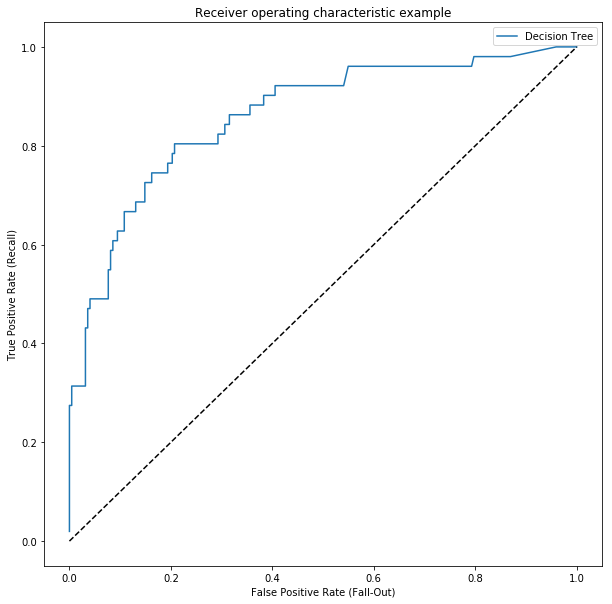

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [40]:
auc(fpr, tpr)

0.8597862568450803

우리는 Recall (Sensitivity) $ \dfrac{TP}{TP+FN} $ 가 매우 중요하다


**Precision의 경우**
- False Positive :
    - 무시해도 될 신인인데 굳이 컨텐츠를 생산했다. 
        - 뭐 어때, 에너지 이상한데 소비하긴 했지만 굿.

**Recall의 경우**
- False Negative:
    - 빠르게 컨텐츠를 생산해야 하는 신인인데, 걸러버렸다.
        - 다른 매체에 선수를 뺐길 수 있다. 유저 유입이 적어짐.
        - 다른 부가 한국에서의 공연 에이전시 계약, 머천다이즈 등 부가적인 기회들을 놓쳐버릴 수 있음.
        - 굉.장.히 중요한 부분 !
        
     

# GridSearch : Random Forest

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
RandomForestClassifier.get_params(model2)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
# pipe_rfc = Pipeline([('scl', StandardScaler()), ('clf', RandomForestClassifier())])

rfc = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
     'class_weight': [None],
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 50],
    'max_features': ['auto'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_impurity_split': [None],
    'min_samples_leaf': [2, 3, 4, 5, 7, 10, 12, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [5, 10, 15, 20, 30, 50],
    'random_state': [None],
     'oob_score': [False],
     'verbose': [0],
     'warm_start': [False]
}


gs = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='recall', cv=10, n_jobs=1)


In [108]:
%%time
gs_result = gs.fit(X_train, y_train)

CPU times: user 29min 49s, sys: 15.1 s, total: 30min 4s
Wall time: 31min 10s


In [109]:
# gs2 = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='precision', cv=10, n_jobs=2)

In [110]:
gs.best_score_

0.7161417134090801

In [111]:
gs.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 15,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Apply Best Parameter from Grid Search

In [117]:
model4 = RandomForestClassifier(criterion='entropy', n_estimators=15, max_depth=20, 
                                min_samples_split=5, min_samples_leaf=3).fit(X_train, y_train)

In [118]:
confusion_matrix(y_train, model4.predict(X_train))

array([[636,   6],
       [ 27, 149]])

In [119]:
print(classification_report(y_train, model4.predict(X_train)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       642
          1       0.96      0.85      0.90       176

avg / total       0.96      0.96      0.96       818



In [120]:
confusion_matrix(y_test, model4.predict(X_test))

array([[215,   7],
       [ 15,  36]])

In [121]:
print(classification_report(y_test, model4.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95       222
          1       0.84      0.71      0.77        51

avg / total       0.92      0.92      0.92       273



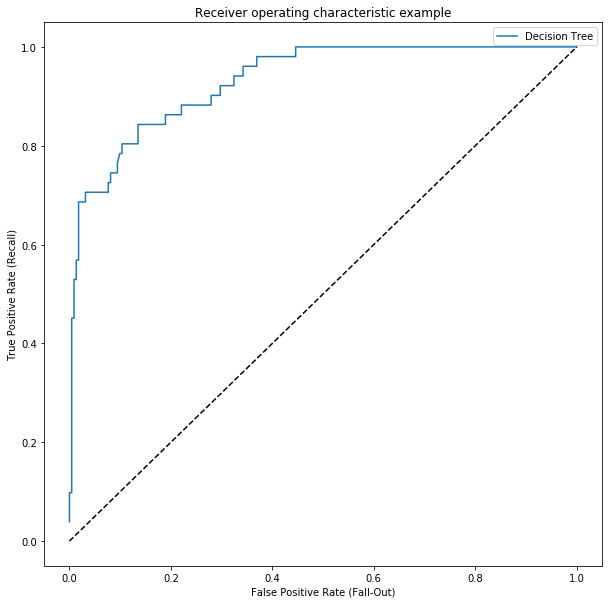

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, model4.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [123]:
auc(fpr, tpr)

0.9318583289171525